# Homework: Salary increase



Homework instruction
Here is the Practical Activity for this Part 1 of the course:
In theoretical classes we worked with the example of salary increase based on age and educational background. The idea of this homework is to use a dataset to train the single layer perceptron to learn this pattern. Instead of using the AND or OR operators, you should use the same code in order to classify whether a person will earn or not a salary increase.
Below you can see the input and output variables
1.	inputs = np.array([[18,2], [20,3], [21, 4],  
2.	                   [35,15], [36,16], [38, 18]])
3.	outputs = np.array([0, 0, 0, 1, 1, 1])
Class "0" (zero) indicates a person won't earn a salary increase, otherwise, class "1" (one) indicates a person will earn a salary increase. After training the single layer perceptron, use the new instances below to make predictions. Will the instances below be classified 0 or 1?
1.	test_inputs = np.array([[17,5], [25,8],  
2.	                        [45,10], [31,20]])
Hint: you will need to normalize the inputs in order to train the neural network. You can use the MinMaxScaler from sklearn library
Good luck!


## Inputs, outputs and weights

In [1]:
import numpy as np

In [2]:
inputs = np.array([[18,2], [20,3], [21, 4],  
                   [35,15], [36,16], [38, 18]])

In [3]:
inputs

array([[18,  2],
       [20,  3],
       [21,  4],
       [35, 15],
       [36, 16],
       [38, 18]])

## MinMax scaler

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs = scaler.fit_transform(inputs)

In [5]:
inputs

array([[0.    , 0.    ],
       [0.1   , 0.0625],
       [0.15  , 0.125 ],
       [0.85  , 0.8125],
       [0.9   , 0.875 ],
       [1.    , 1.    ]])

## Inputs, outputs and weights

In [6]:
inputs.shape

(6, 2)

In [7]:
outputs = np.array([0, 0, 0, 1, 1, 1])

In [ ]:
outputs.shape

(6,)

In [8]:
weights = np.array([0.0, 0.0])

In [9]:
learning_rate = 0.1

## Step function

In [10]:
def step_function(sum):
  if (sum >= 1):
    return 1
  return 0

## Calculate output

In [11]:
def calculate_output(instance):
  s = instance.dot(weights)
  return step_function(s)

## Train

In [12]:
def train():
  total_error = 1
  while (total_error != 0):
    total_error = 0
    for i in range(len(outputs)):
      prediction = calculate_output(inputs[i])
      error = abs(outputs[i] - prediction)
      total_error += error
      if error > 0:
        for j in range(len(weights)):
          weights[j] = weights[j] + (learning_rate * inputs[i][j] * error)
          print('Weight updated: ' + str(weights[j]))
    print('Total error: ' + str(total_error))

In [13]:
train()

Weight updated: 0.085
Weight updated: 0.08125
Weight updated: 0.17500000000000002
Weight updated: 0.16875
Weight updated: 0.275
Weight updated: 0.26875000000000004
Total error: 3
Weight updated: 0.36000000000000004
Weight updated: 0.35000000000000003
Weight updated: 0.45000000000000007
Weight updated: 0.43750000000000006
Weight updated: 0.55
Weight updated: 0.5375000000000001
Total error: 3
Weight updated: 0.635
Weight updated: 0.6187500000000001
Total error: 1
Total error: 0


## Graph

In [14]:
import pandas as pd
df1 = pd.DataFrame(data=inputs, columns=["age", "educational"])
df1

,age,educational
0,0.00,0.0000
1,0.10,0.0625
2,0.15,0.1250
3,0.85,0.8125
4,0.90,0.8750
5,1.00,1.0000


In [15]:
df2 = pd.DataFrame(data=outputs, columns=["class"])
df2

,class
0,0
1,0
2,0
3,1
4,1
5,1


In [16]:
df = pd.concat([df1, df2], axis=1)
df

,age,educational,class
0,0.00,0.0000,0
1,0.10,0.0625,0
2,0.15,0.1250,0
3,0.85,0.8125,1
4,0.90,0.8750,1
5,1.00,1.0000,1


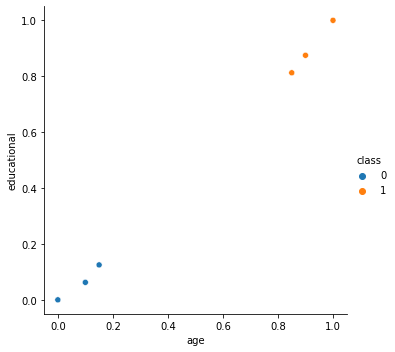

In [17]:
import seaborn as sns
sns.relplot(x="age", y="educational", data = df, hue = "class")

## Classification

In [18]:
inputs

array([[0.    , 0.    ],
       [0.1   , 0.0625],
       [0.15  , 0.125 ],
       [0.85  , 0.8125],
       [0.9   , 0.875 ],
       [1.    , 1.    ]])

In [19]:
weights

array([0.635  , 0.61875])

In [20]:
calculate_output(np.array([0.,0.]))

0

In [21]:
calculate_output(np.array([1.,1.]))

1

In [22]:
test_inputs = np.array([[17,5], [25,8],  
                        [45,10], [31,20]])

In [23]:
test_inputs = scaler.transform(test_inputs)
test_inputs

array([[-0.05  ,  0.1875],
       [ 0.35  ,  0.375 ],
       [ 1.35  ,  0.5   ],
       [ 0.65  ,  1.125 ]])

In [25]:
for i in range(len(test_inputs)):
  #print(test_inputs[i])
  print(calculate_output(test_inputs[i]))

0
0
1
1


**Conclusion:**


*   [17,5] and [25,8] age/educational test_input group received '0' as output, means salary increase is not expected
*   [45,10] and [31,20] age/educational test_input group received '1' as output, means salary increase is expected.


